In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import wget


In [2]:
def fetch():
    name = 'us-counties.csv'
    url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
    wget.download(url, name)
    return name

def read(file):
    return pd.read_csv(file)

def extract_counties(df):
    d = {}
    for index, row in df.iterrows():
        d[(row.county,row.state)] = {'county': row.county, 'state': row.state}
    return d

def select_county(df, county, state):
    return df[(df.county == county) & (df.state == state)]

def process_county(c):
    d = pd.DataFrame(columns=['date', 'cases', 'new_cases', 'deaths'])
    d.date = c.date
    d.cases = c.cases
    d.deaths = c.deaths
    d.new_cases = c.cases - c.cases.shift(1)
    d.iloc[0,d.columns.get_loc('new_cases')] = 0
    return d

def plot_county(df, county, state):
    c = process_county(select_county(df, county, state))
    ax = c.plot('date', 'cases', title='Covid-19 in %s, %s' % (county, state), rot=45)
    c.plot('date', 'deaths', ax=ax)
    p = c.plot('date', 'new_cases', secondary_y=True, ax=ax, rot=45)
    plt.show()
    p.get_figure().savefig(join('plots','%s:%s.png' % (county, state)))
    
def main():
    df = read(fetch())
    counties = extract_counties(df)
    for c in counties:
        print(c[0])
        plot_county(df, c[0], c[1])

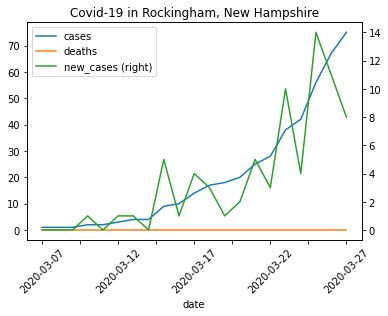

In [3]:
plot_county(read(fetch()), 'Rockingham', 'New Hampshire')
    